In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
# loading R packages
library(phyloseq)
library(plyr)
library(dplyr)
#dplyr needs to come in last
library(ggplot2)
library(rwantshue)
library(RColorBrewer)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
%%R

physeq = import_biom("../../../ITS/SeqData/ITS.otu_table.tax.meta.biom", parseFunction = parse_taxonomy_greengenes)
Merge<-paste(as.character(sample_data(physeq)$Trtmt),as.character(sample_data(physeq)$Month),as.character(sample_data(physeq)$Cosm),sep="_")
sample_data(physeq)$Merge <- Merge
# Creating a new column in the phyloseq sample data called Merge,
# which contains a concatenated ID so all samples from the same mineral, month, and cosm
# will have the same ID (thus merging PCR and buffer replicates).

ps.merged = merge_samples(physeq, "Merge")
# Merging the phyloseq object by biological replicates

#ps.merged = subset_samples(ps.merged,row.names(sample_data(ps.merged))!="S_2.5_14")
# Removing soil sample with large Onygenales taxon (Emmonsia) - soil saprotroph, but huge

keep=c("Cosm","Month","Trtmt")
sd = sample_data(ps.merged)
sd = sd[,keep]
sd$Trtmt = substring(row.names(sd),1,1)
sd$Trtmt[sd$Trtmt=="B"]="Blank"
sd$Trtmt[sd$Trtmt=="F"]="Ferrihydrite"
sd$Trtmt[sd$Trtmt=="Q"]="Quartz"
sd$Trtmt[sd$Trtmt=="H"]="Heavy Fraction"
sd$Trtmt[sd$Trtmt=="S"]="Soil"
sd$Trtmt[sd$Trtmt=="K"]="Kaolinite"
sample_data(ps.merged) = sd
sample_data(ps.merged)
# Cleaning up the sample data table
physeqF = ps.merged

physeq = import_biom("../../SeqData/otu_table.tax.meta.biom", "../../SeqData/trees/fulltree.tre", parseFunction = parse_taxonomy_greengenes)

Merge<-paste(as.character(sample_data(physeq)$Trtmt),as.character(sample_data(physeq)$Month),as.character(sample_data(physeq)$Cosm),sep="_")
sample_data(physeq)$Merge <- Merge
# Creating a new column in the phyloseq sample data called Merge,
# which contains a concatenated ID so all samples from the same mineral, month, and cosm
# will have the same ID (thus merging PCR and buffer replicates).

ps.merged = merge_samples(physeq, "Merge")
# Merging the phyloseq object by biological replicates

keep=c("Cosm","Month","Trtmt")
sd = sample_data(ps.merged)
sd = sd[,keep]
sd$Trtmt = substring(row.names(sd),1,1)
sd$Trtmt[sd$Trtmt=="B"]="Blank"
sd$Trtmt[sd$Trtmt=="F"]="Ferrihydrite"
sd$Trtmt[sd$Trtmt=="Q"]="Quartz"
sd$Trtmt[sd$Trtmt=="H"]="Heavy Fraction"
sd$Trtmt[sd$Trtmt=="S"]="Soil"
sd$Trtmt[sd$Trtmt=="K"]="Kaolinite"
sample_data(ps.merged) = sd
sample_data(ps.merged)
# Cleaning up the sample data table
physeqB = ps.merged

FUNGI = psmelt(physeqF)
BACT = psmelt(physeqB)

In [5]:
%%R

d.Seb = FUNGI %>%
    dplyr::group_by(Sample) %>%
    dplyr::mutate(Abundance=Abundance/sum(Abundance))%>%
    dplyr::filter(Species == "Sebacinales sp" | Species == "Serendipita vermifera")%>%
    dplyr::select(Sample,Month,Trtmt,Species,Abundance)
d.Seb
# Collects all the relative abundance levels and l2FC for the Sebacinales guys

Source: local data frame [292 x 5]
Groups: Sample

     Sample Month        Trtmt               Species Abundance
1    F_3_44   3.0 Ferrihydrite        Sebacinales sp 0.3435715
2    F_3_44   3.0 Ferrihydrite Serendipita vermifera 0.3259589
3    F_3_23   3.0 Ferrihydrite Serendipita vermifera 0.3758316
4    F_3_20   3.0 Ferrihydrite Serendipita vermifera 0.3304693
5  F_2.5_30   2.5 Ferrihydrite Serendipita vermifera 0.3973496
6  F_2.5_13   2.5 Ferrihydrite        Sebacinales sp 0.3138398
7    F_3_20   3.0 Ferrihydrite        Sebacinales sp 0.2130336
8  Q_2.5_30   2.5       Quartz Serendipita vermifera 0.2593280
9    Q_3_20   3.0       Quartz Serendipita vermifera 0.3310927
10 Q_2.5_42   2.5       Quartz Serendipita vermifera 0.1739719
..      ...   ...          ...                   ...       ...


In [6]:
%%R
d.Bact = BACT %>%
    dplyr::group_by(Sample) %>%
    dplyr::mutate(Abundance=Abundance/sum(Abundance))%>%
    dplyr::select(Sample,Month,Trtmt,Phylum,Class,Order,Family,Genus,Species,Abundance)

d.Bact

Source: local data frame [606,540 x 10]
Groups: Sample

     Sample Month        Trtmt         Phylum               Class
1    Q_3_12   3.0       Quartz  Bacteroidetes       [Saprospirae]
2    F_3_44   3.0 Ferrihydrite Proteobacteria  Betaproteobacteria
3    F_3_44   3.0 Ferrihydrite  Bacteroidetes       [Saprospirae]
4  F_2.5_16   2.5 Ferrihydrite  Bacteroidetes       [Saprospirae]
5  F_2.5_14   2.5 Ferrihydrite  Bacteroidetes       [Saprospirae]
6    F_2_15   2.0 Ferrihydrite  Bacteroidetes       [Saprospirae]
7  F_2.5_16   2.5 Ferrihydrite Actinobacteria      Actinobacteria
8  Q_2.5_30   2.5       Quartz Proteobacteria Gammaproteobacteria
9  F_2.5_13   2.5 Ferrihydrite Proteobacteria  Betaproteobacteria
10 F_2.5_14   2.5 Ferrihydrite Proteobacteria Alphaproteobacteria
..      ...   ...          ...            ...                 ...
Variables not shown: Order (fctr), Family (fctr), Genus (fctr), Species (fctr),
  Abundance (dbl)


In [7]:
%%R

d.Bact.Seb <- merge(d.Bact,d.Seb,by=c("Sample"))
head(d.Bact.Seb)

  Sample Month.x Trtmt.x         Phylum               Class        Order
1    B__      NA   Blank    Chloroflexi                TK10    B07_WMSP1
2    B__      NA   Blank    Chloroflexi                TK10    B07_WMSP1
3    B__      NA   Blank    Chloroflexi                TK10    B07_WMSP1
4    B__      NA   Blank    Chloroflexi                TK10    B07_WMSP1
5    B__      NA   Blank Proteobacteria Deltaproteobacteria Myxococcales
6    B__      NA   Blank Proteobacteria Deltaproteobacteria Myxococcales
            Family Genus Species.x Abundance.x Month.y Trtmt.y
1         FFCH4570  <NA>      <NA>           0      NA   Blank
2         FFCH4570  <NA>      <NA>           0      NA   Blank
3         FFCH4570  <NA>      <NA>           0      NA   Blank
4         FFCH4570  <NA>      <NA>           0      NA   Blank
5 Cystobacterineae  <NA>      <NA>           0      NA   Blank
6 Cystobacterineae  <NA>      <NA>           0      NA   Blank
              Species.y Abundance.y
1        Seb

In [81]:
%%R
cutoff = 0.0001

d = d.Bact.Seb%>%
    filter(Genus=="Rhizobium")%>%
    filter(Trtmt.x == "Ferrihydrite" | Trtmt.x == "Quartz" | Trtmt.x == "Soil")%>%
    filter(Abundance.x >= cutoff)
dim(d)

[1] 196  14


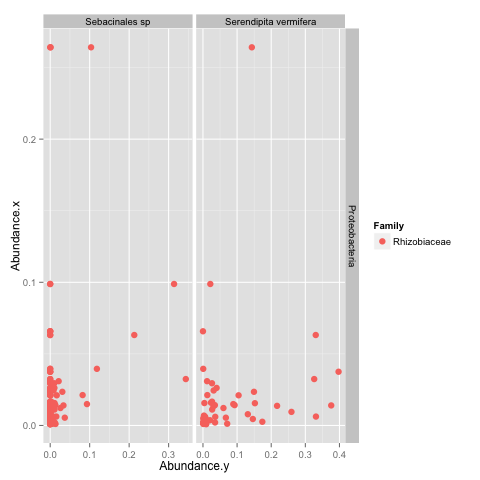

In [83]:
%%R


p = ggplot(d,aes(x = Abundance.y, y = Abundance.x, color = Family))
p = p + geom_point(size=3)
p = p + facet_grid(~Phylum~Species.y, scales="free")
p

In [73]:
%%R

d.Correl = d.Bact.Seb%>%
#    filter(Genus=="Azospirillum")%>%
    filter(Trtmt.x == "Ferrihydrite" | Trtmt.x == "Quartz" | Trtmt.x == "Soil")%>%
    filter(Abundance.x >= cutoff)%>%
    group_by(Phylum,Class,Order,Family)%>%
    summarize(Correl = cor(Abundance.x,Abundance.y))

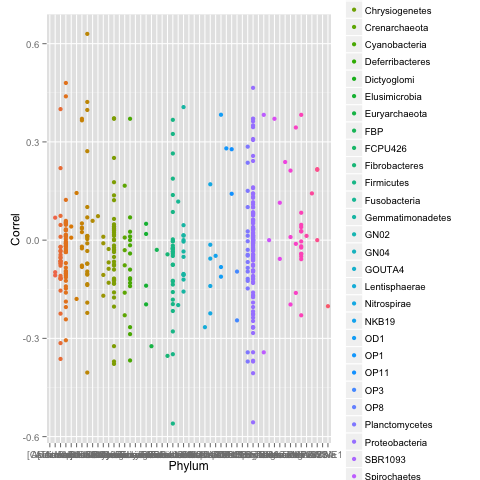

In [74]:
%%R
p = ggplot(d,aes(x=Phylum,y=Correl,color=Phylum))
p = p + geom_point()
p

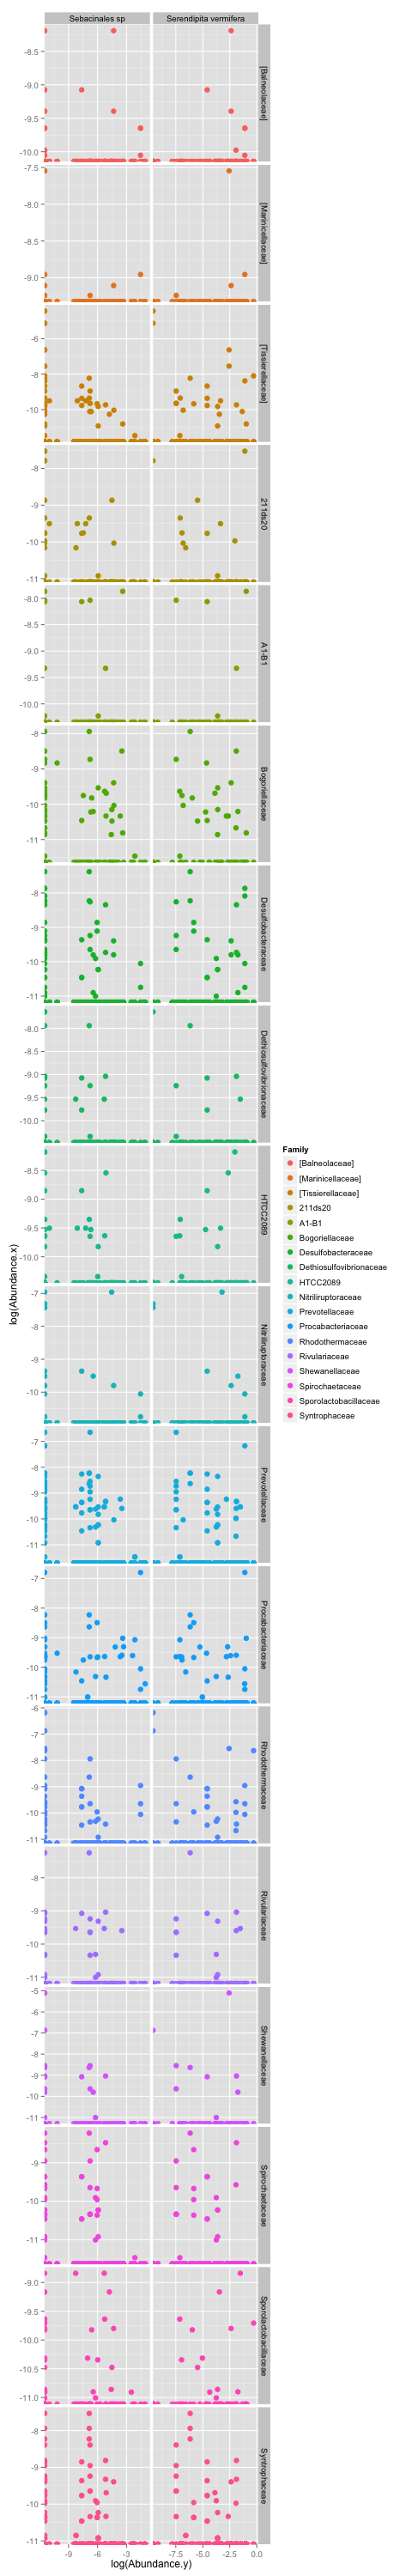

In [80]:
%%R -h 3000
Cutoff = 0.3
PosCorrel = na.omit(d.Correl[d.Correl$Correl>=Cutoff,]$Family)

d = d.Bact.Seb%>%
    filter(Family %in% PosCorrel)

p = ggplot(d,aes(x = log(Abundance.y), y = log(Abundance.x), color = Family))
p = p + geom_point(size=3)
p = p + facet_grid(~Family~Species.y, scales="free")
p

###Nothing really compelling